In [30]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import norm

In [4]:
df=pd.read_csv("cleaned_Housing.csv")

In [5]:
df.head()

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,...,YEAR_BUILT,YEAR_RENOVATED,STREET_ADDRESS,CITY,STATEZIP,COUNTRY,WATERFRONT_RANKING,VIEWS_CATEGORY,CONDITION_CATEGORY,YEAR_DIFFERENCE
0,2014-05-03,310000,3,1,1010.0,9945.0,1,0,0,4,...,1973,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,No,Poor,Good,NOT RENOVATED YET
1,2014-05-04,775000,2,3,2680.0,7392.0,1,0,0,3,...,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA,No,Poor,Average,-1
2,2014-05-04,365000,3,3,2200.0,7350.0,1,0,0,5,...,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,No,Poor,Excellent,NOT RENOVATED YET
3,2014-05-04,331950,4,3,2530.0,9933.0,2,0,2,3,...,1990,2009,925 48th Ct,Auburn,WA 98092,USA,No,Average,Average,19
4,2014-05-04,783500,3,3,2850.0,7130.0,2,0,0,3,...,1980,0,151 Euclid Ave,Seattle,WA 98122,USA,No,Poor,Average,NOT RENOVATED YET


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3607 entries, 0 to 3606
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REGISTERED_DATE     3607 non-null   object 
 1   PRICE_OF_THE_HOUSE  3607 non-null   int64  
 2   BEDROOMS_COUNT      3607 non-null   int64  
 3   BATHROOMS_COUNT     3607 non-null   int64  
 4   HOUSE_SQFT          3607 non-null   float64
 5   TOTAL_LAND_SQFT     3607 non-null   float64
 6   FLOORS_COUNTS       3607 non-null   int64  
 7   WATERFRONT_VIEWS    3607 non-null   int64  
 8   VIEW_RANKING        3607 non-null   int64  
 9   CONDITION_RANKING   3607 non-null   int64  
 10  ABOVE_SQFT          3607 non-null   int64  
 11  BASEMENT_SQFT       3607 non-null   int64  
 12  YEAR_BUILT          3607 non-null   int64  
 13  YEAR_RENOVATED      3607 non-null   int64  
 14  STREET_ADDRESS      3607 non-null   object 
 15  CITY                3607 non-null   object 
 16  STATEZ

In [7]:
df['AGE'] = 2025 - df['YEAR_BUILT']

In [8]:
df['PRICE_PER_SQFT'] = df['PRICE_OF_THE_HOUSE'] / df['HOUSE_SQFT']

In [9]:
df.drop('price_per_sqft', axis=1, inplace=True)

KeyError: "['price_per_sqft'] not found in axis"

# UNIVARIANT ANALYSIS

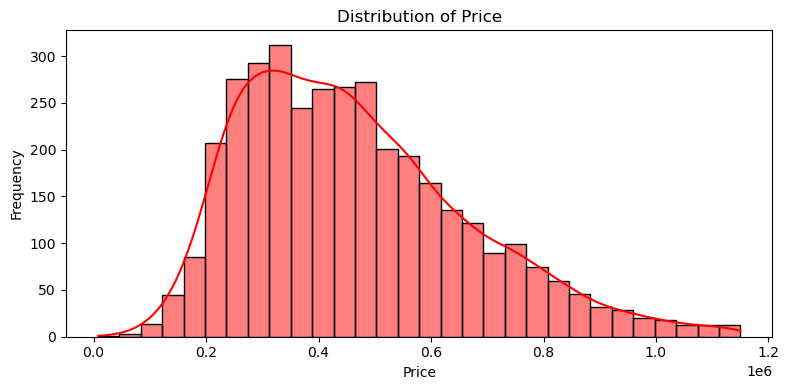

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['PRICE_OF_THE_HOUSE'], kde=True, bins=30,color='#FF0000')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution is right-skewed, indicating most properties are priced low with a few high-priced.

The majority of property prices fall between 0.2 and 0.3 (scaled values).

A long tail on the right highlights the presence of luxury or unusually expensive properties.

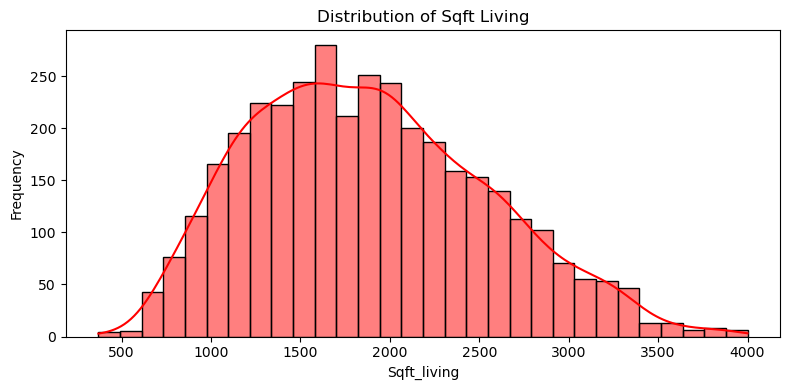

In [36]:
plt.figure(figsize=(8, 4))
sns.histplot(df['HOUSE_SQFT'], kde=True, bins=30,color='#FF0000')
plt.title('Distribution of Sqft Living')
plt.xlabel('Sqft_living')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution is slightly right-skewed, indicating most homes have moderate living space, with fewer very large homes.

The majority of properties have living areas between 1,000 to 2,000 sqft.

A long right tail suggests the presence of a small number of very large or luxury homes.

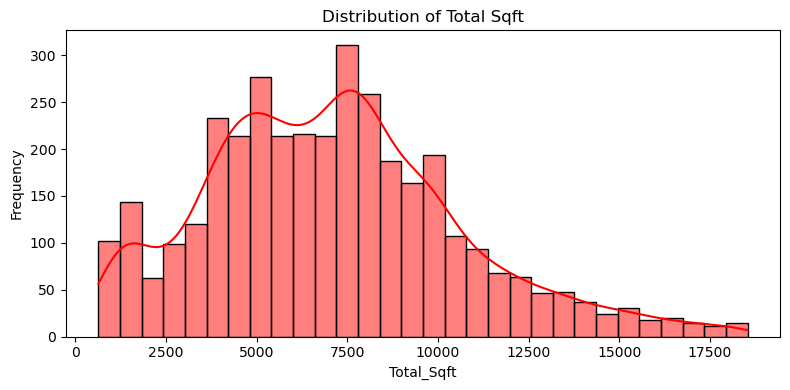

In [38]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TOTAL_LAND_SQFT'], kde=True, bins=30,color='#FF0000')
plt.title('Distribution of Total Sqft')
plt.xlabel('Total_Sqft')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution is highly right-skewed, indicating most properties have smaller lot sizes with fewer having very large land areas.

The highest frequency is observed between 4,000 and 8,000 sqft, which is the most common land size range.

The presence of extreme values beyond 15,000 sqft suggests a few properties with significantly large land areas.

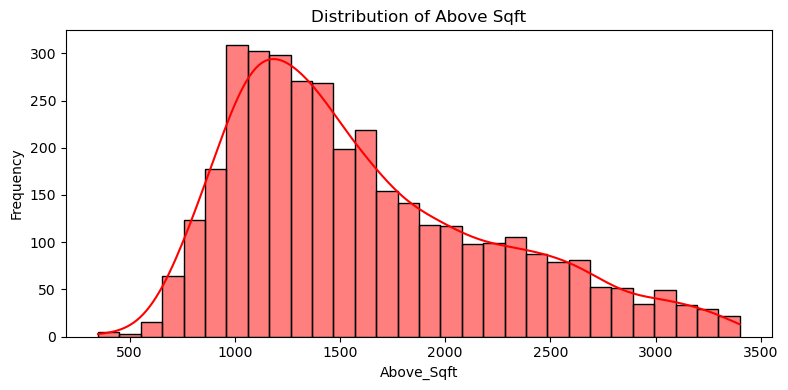

In [46]:
plt.figure(figsize=(8, 4))
sns.histplot(df['ABOVE_SQFT'], kde=True, bins=30,color='#FF0000')
plt.title('Distribution of Above Sqft')
plt.xlabel('Above_Sqft')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution is right-skewed, indicating most homes have moderate above-ground square footage.

The peak frequency is around 1,000 to 1,200 sqft, which is common for the majority of homes.

A gradual decline is observed beyond 2,000 sqft, showing fewer homes with larger above-ground area.

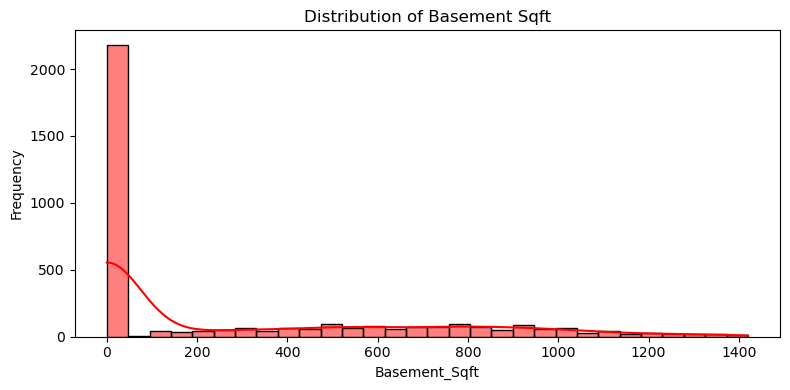

In [48]:
plt.figure(figsize=(8, 4))
sns.histplot(df['BASEMENT_SQFT'], kde=True, bins=30,color='#FF0000')
plt.title('Distribution of Basement Sqft')
plt.xlabel('Basement_Sqft')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution is highly right-skewed, with a large number of homes having zero basement area.

A sharp spike at 0 sqft suggests many properties don’t have basements.

A small proportion of homes have basement areas ranging from 200 to 1,400 sqft.

The distribution curve shows a long tail, indicating a few properties with large basement space.

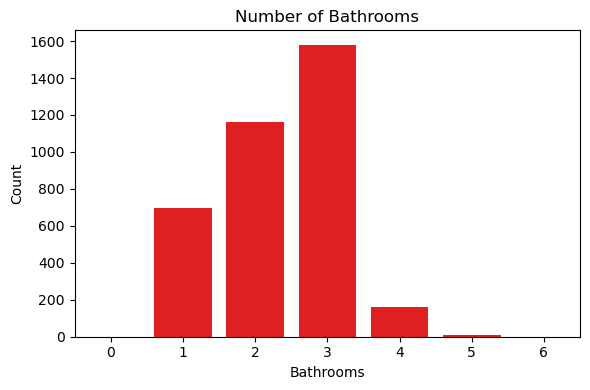

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='BATHROOMS_COUNT',color='#FF0000')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Most homes have 3 bathrooms, making it the dominant configuration in the dataset.

Properties with 2 bathrooms form the next largest group, followed by a smaller but notable share with 1 bathroom.

Houses with 4 or more bathrooms are rare outliers, indicating larger or luxury properties.

Virtually no homes have 0 bathrooms, confirming bathrooms are standard across listings.

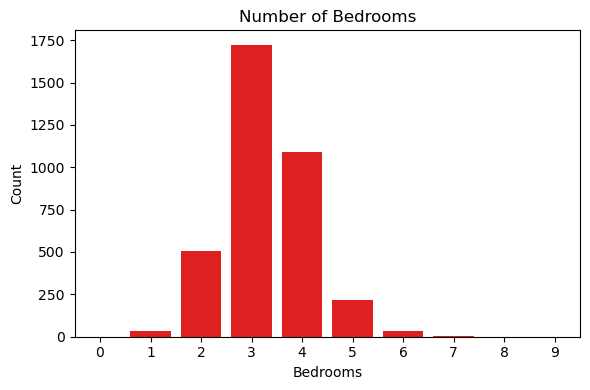

In [127]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='BEDROOMS_COUNT',color='#FF0000')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

3-bedroom homes are the most common in the dataset, showing they are the standard or most preferred layout.

4-bedroom and 2-bedroom homes also appear frequently, providing alternatives for slightly larger or smaller households.

Properties with 5 or more bedrooms are rare, suggesting they are luxury or larger family homes.

Very few listings have 1 or 0 bedrooms, possibly indicating studio apartments or data entry errors.

In [26]:
top_10_ages = df['AGE'].value_counts().head(10).index
df_filtered = df[df['AGE'].isin(top_10_ages)]

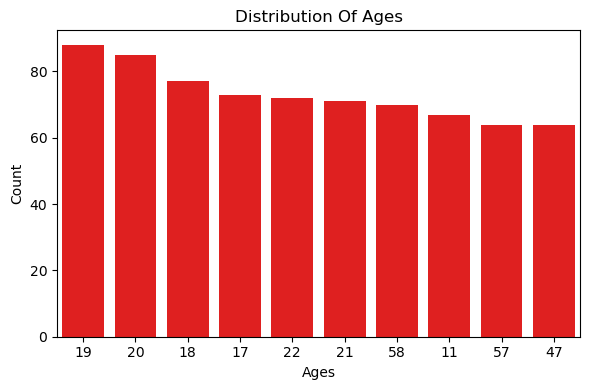

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_filtered, x='AGE', color='#FF0000', order=top_10_ages)
plt.title('Distribution Of Ages')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# BIVARIANT ANALYSIS

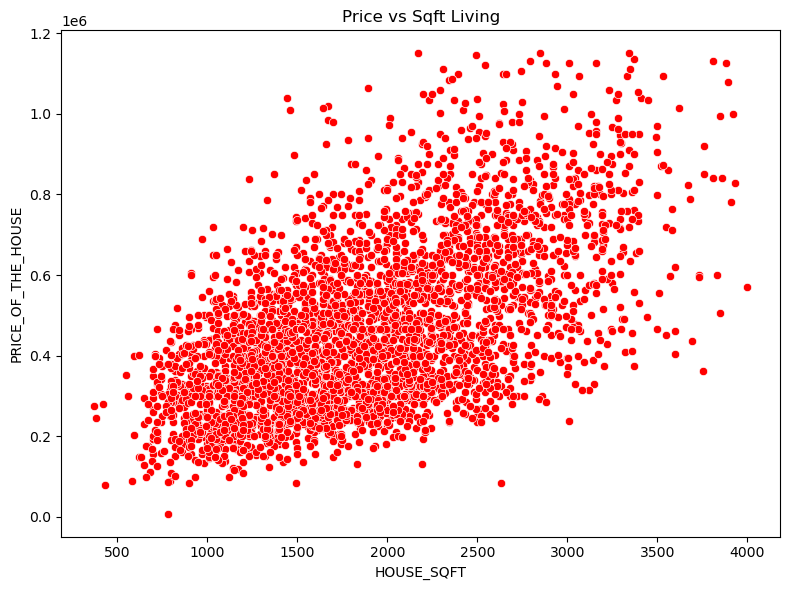

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='HOUSE_SQFT', y='PRICE_OF_THE_HOUSE',color='#FF0000')
plt.title('Price vs Sqft Living')
plt.xlabel('HOUSE_SQFT')
plt.ylabel('PRICE_OF_THE_HOUSE')
plt.tight_layout()
plt.show()

The scatter plot shows a positive correlation between HOUSE_SQFT and PRICE_OF_THE_HOUSE:

As the square footage increases, the house price generally increases.

The trend is not perfectly linear—there is wider price variation for larger homes.

Homes with lower sqft but high prices (may be due to location or amenities).

Homes with very large sqft but relatively moderate prices (possibly older or less desirable properties).

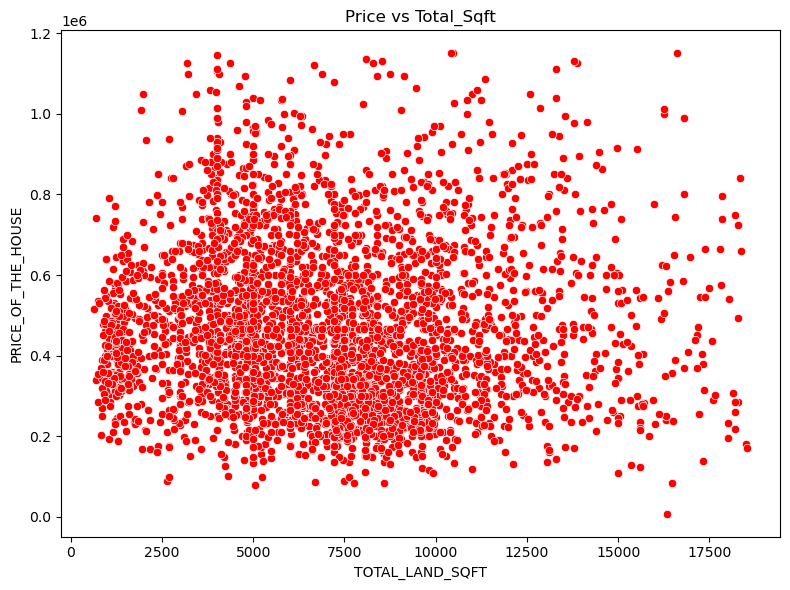

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TOTAL_LAND_SQFT', y='PRICE_OF_THE_HOUSE',color='#FF0000')
plt.title('Price vs Total_Sqft')
plt.xlabel('TOTAL_LAND_SQFT')
plt.ylabel('PRICE_OF_THE_HOUSE')
plt.tight_layout()
plt.show()

Houses with similar land sizes show a wide range of prices, indicating that factors like location and amenities significantly impact valuation.

Larger plots generally tend to have higher prices, but the scattered distribution suggests a weak correlation between land size and price.

Most properties fall within 2,500 to 12,500 square feet and 200,000 to 800,000 dollars, defining the typical range in your dataset.

few with extremely high prices or unusually large plots stand apart, possibly indicating luxury estates or unique cases worth further analysis.


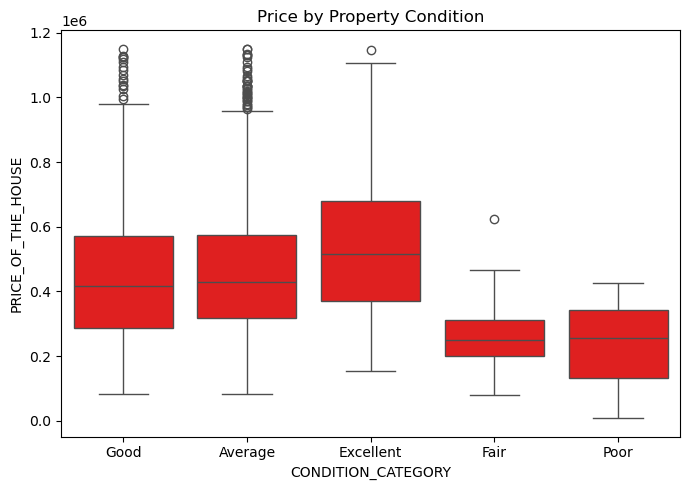

In [62]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='CONDITION_CATEGORY', y='PRICE_OF_THE_HOUSE',color='#FF0000')
plt.title('Price by Property Condition')
plt.xlabel('CONDITION_CATEGORY')
plt.ylabel('PRICE_OF_THE_HOUSE')
plt.tight_layout()
plt.show()

"Good" and "Average" condition categories show similar distributions in price, indicating that buyers may not significantly differentiate between these two.

Homes in "Poor" and "Fair" condition are associated with the lowest median prices, highlighting the negative influence of poor maintenance or repair needs.

All condition categories exhibit a range of high-value outliers, especially in better conditions,

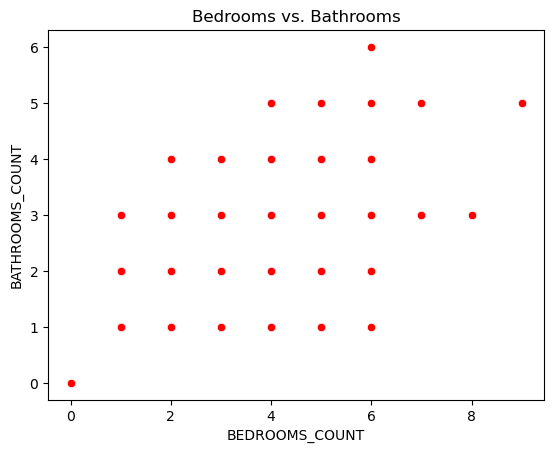

<Figure size 640x480 with 0 Axes>

In [68]:
sns.scatterplot(x = 'BEDROOMS_COUNT', y = 'BATHROOMS_COUNT', data = df,color='#FF0000')
plt.title('Bedrooms vs. Bathrooms')
plt.show()
plt.tight_layout()
plt.show()

Most properties have between 2 to 5 bedrooms and 1 to 4 bathrooms, indicating a common configuration range.

There is a general upward trend—houses with more bedrooms tend to have more bathrooms, though the relationship isn't strictly linear.

Some properties with high bedroom counts still have relatively few bathrooms, which may indicate older designs or less luxurious homes.

Outliers with very low bathroom counts and high bedroom counts exist, potentially indicating properties in need of renovation or special-use properties like dorm-style housing.

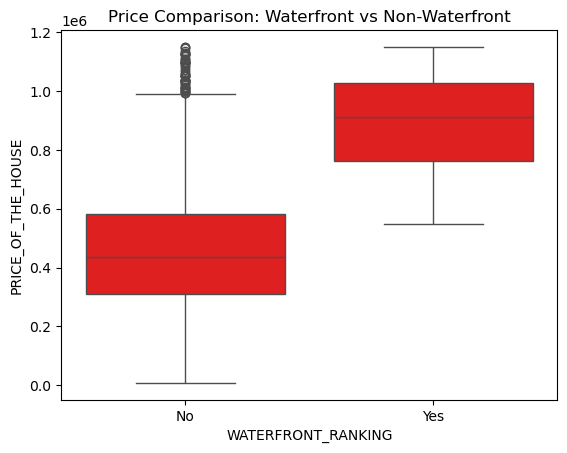

In [136]:
sns.boxplot(x = 'WATERFRONT_RANKING', y = 'PRICE_OF_THE_HOUSE', data = df,color='#FF0000')
plt.title('Price Comparison: Waterfront vs Non-Waterfront')
plt.show()

Waterfront-ranked properties (“Yes”) have a significantly higher median price compared to non-waterfront ones (“No”), indicating strong buyer preference and added value.

The price distribution for waterfront-ranked homes is tighter and more concentrated in the higher price range, suggesting consistent valuation.

Non-waterfront properties have a lower and more spread-out price range, reflecting a wider variety of property types and quality levels.

The absence of outliers indicates the observed differences are based on consistent trends rather than extreme values.

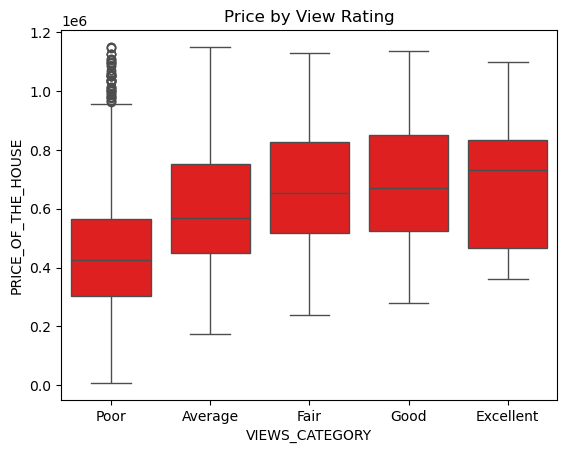

In [84]:
sns.boxplot(x = 'VIEWS_CATEGORY', y = 'PRICE_OF_THE_HOUSE', data = df,color='#FF0000')
plt.title('Price by View Rating')
plt.show()

House prices tend to increase with better view ratings, showing a positive relationship between view quality and property value.

The median price rises steadily from “Poor” to “Excellent” view categories, reflecting buyer willingness to pay more for scenic views.

Properties rated “Excellent” have the highest and most consistent price range, indicating strong market value for superior views.

Lower view categories like “Poor” and “Average” exhibit lower medians and wider spreads, suggesting more pricing variability in less desirable locations.

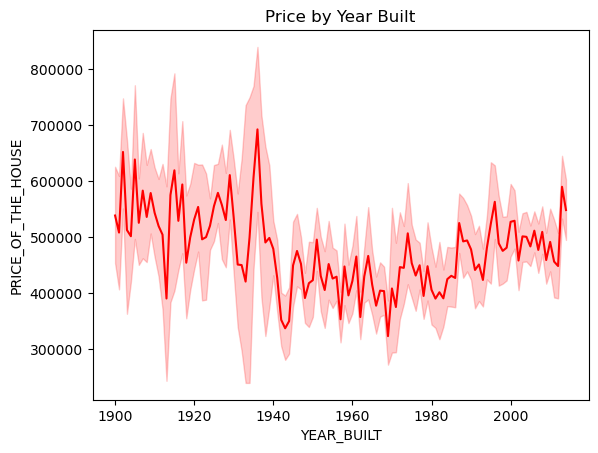

In [118]:
sns.lineplot(x = 'YEAR_BUILT', y = 'PRICE_OF_THE_HOUSE', data = df,color='#FF0000')
plt.title('Price by Year Built')
plt.show()

House prices fluctuate significantly for homes built before 1950, showing greater uncertainty and variability.

From around 1950 to 1980, prices tend to stabilize at a lower average compared to earlier decades.

Post-1980 homes gradually show a rising price trend, suggesting that newer constructions are generally valued higher.

Despite some volatility, the general pattern indicates a positive relationship between newer build years and higher house prices.

# MULTIVARIANT ANALYSIS

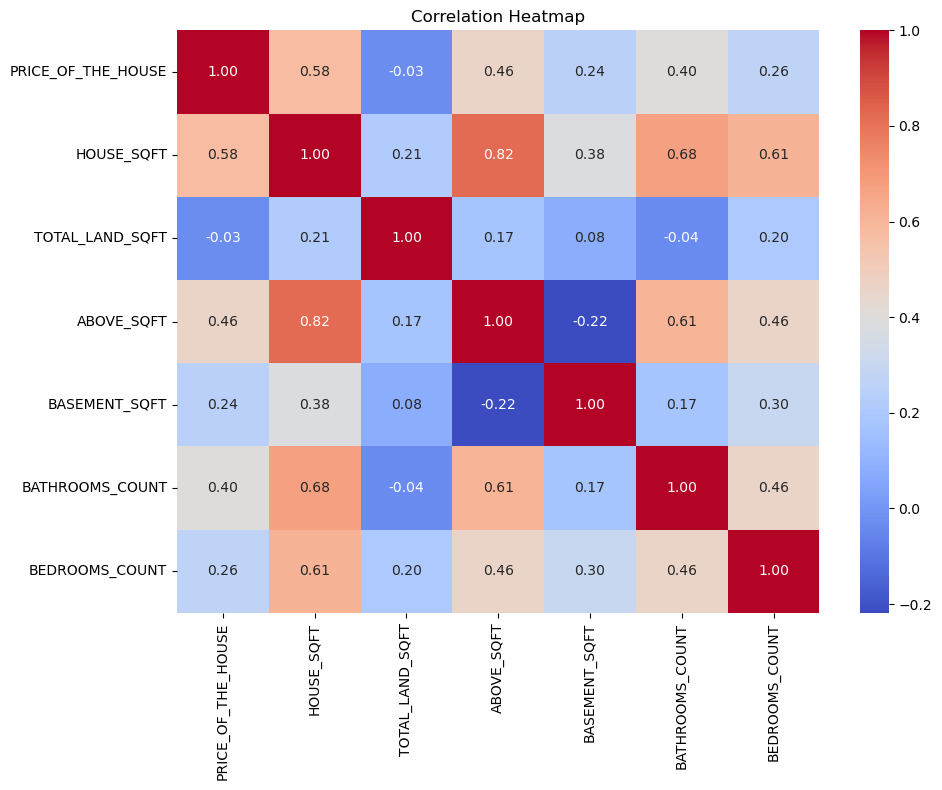

In [74]:
plt.figure(figsize=(10, 8))
corr = df[["PRICE_OF_THE_HOUSE","HOUSE_SQFT","TOTAL_LAND_SQFT","ABOVE_SQFT","BASEMENT_SQFT","BATHROOMS_COUNT","BEDROOMS_COUNT"]].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

HOUSE_SQFT has the strongest positive correlation with PRICE_OF_THE_HOUSE (0.58), meaning larger homes tend to be more expensive.

ABOVE_SQFT and BATHROOMS_COUNT also show moderate positive correlations with price (0.46 and 0.40, respectively).

TOTAL_LAND_SQFT has a very weak negative correlation with price (-0.03), indicating land size does not significantly impact house price.

BEDROOMS_COUNT has a weak correlation with price (0.26), suggesting that just having more bedrooms doesn't guarantee a higher price.

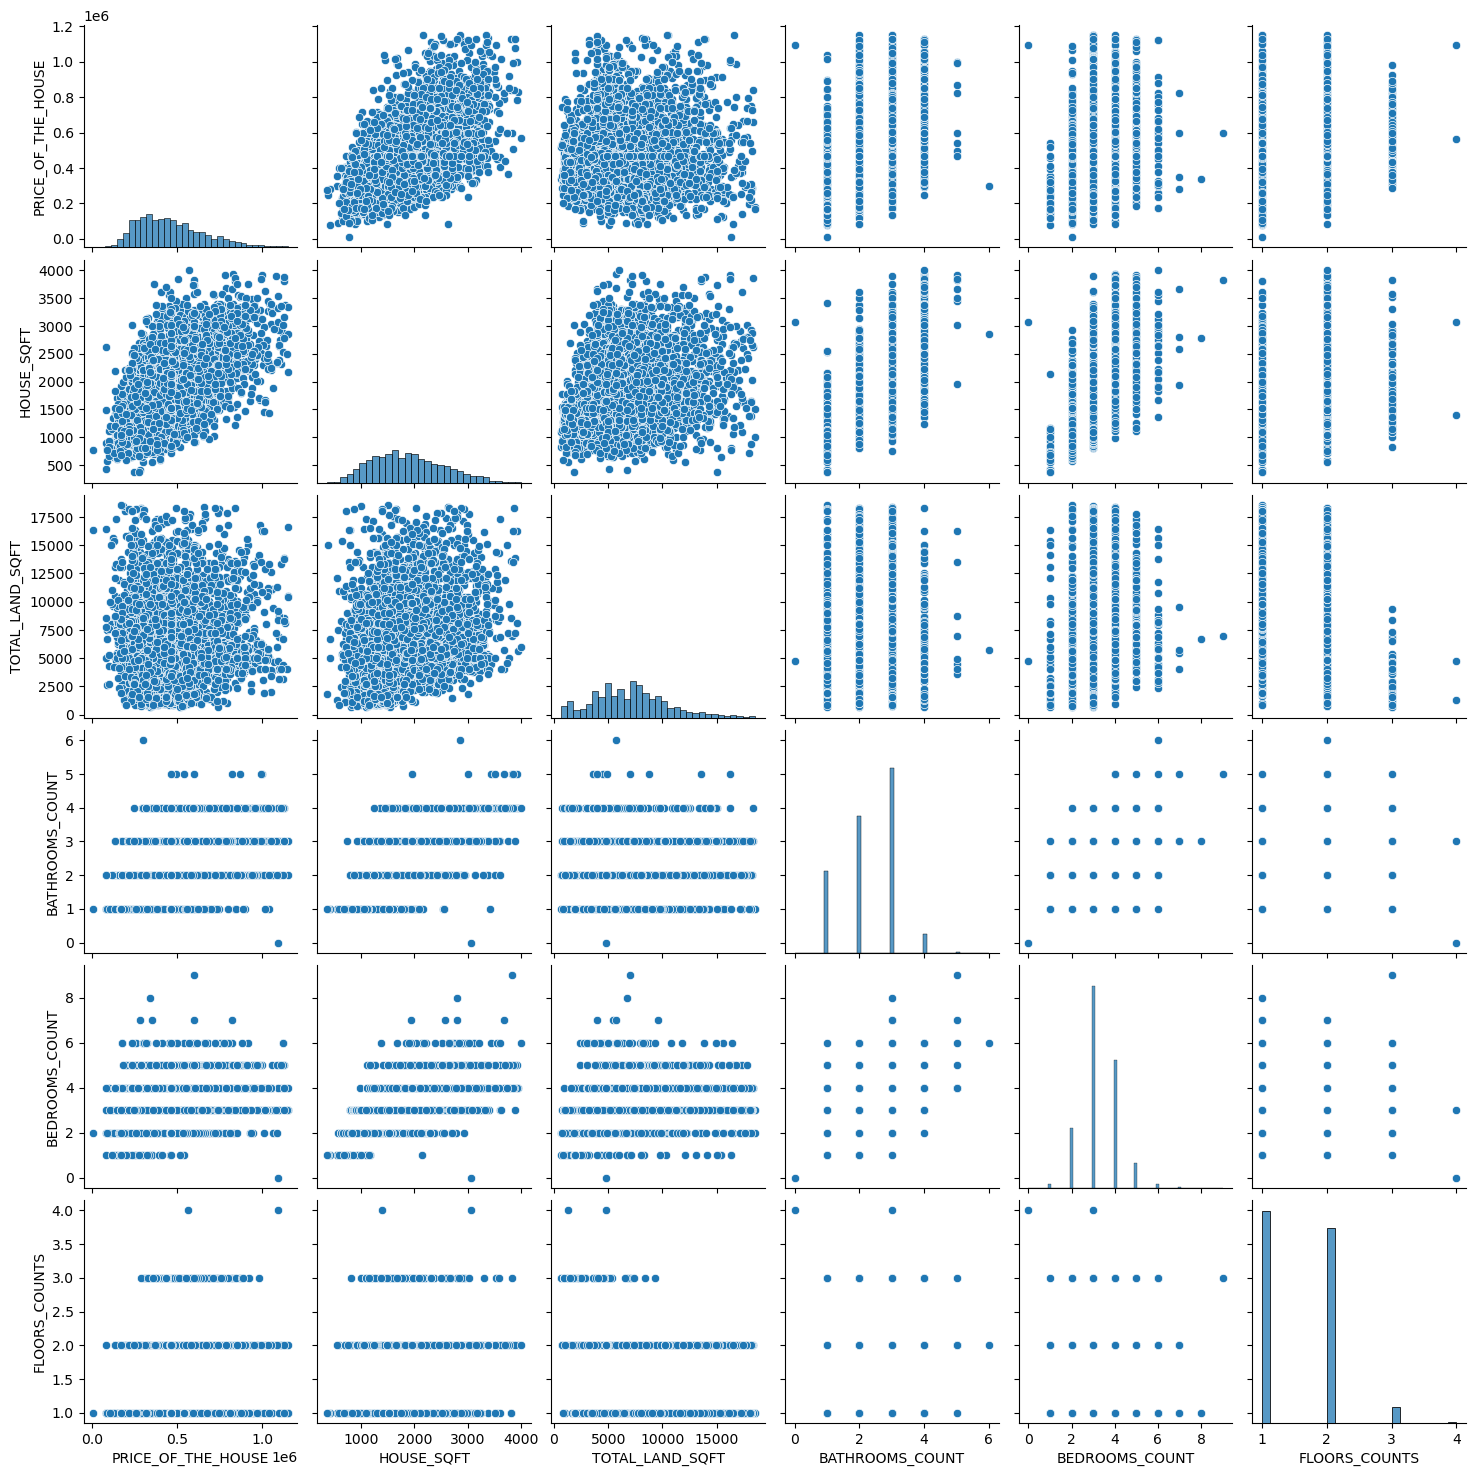

In [114]:
key_features = ["PRICE_OF_THE_HOUSE","HOUSE_SQFT","TOTAL_LAND_SQFT","BATHROOMS_COUNT","BEDROOMS_COUNT","FLOORS_COUNTS"]
sns.pairplot(df[key_features])
plt.show()

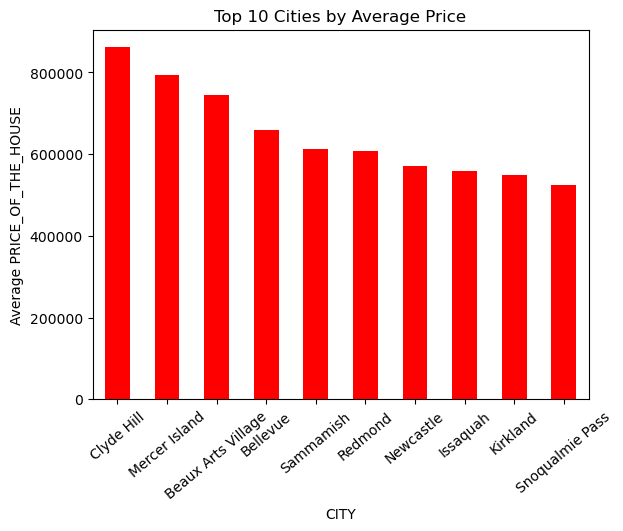

In [108]:
city_avg = df.groupby('CITY')['PRICE_OF_THE_HOUSE'].mean().sort_values(ascending=False).head(10)
city_avg.plot(kind='bar', title='Top 10 Cities by Average Price',color='#FF0000')
plt.ylabel('Average PRICE_OF_THE_HOUSE')
plt.xticks(rotation=40)
plt.show()

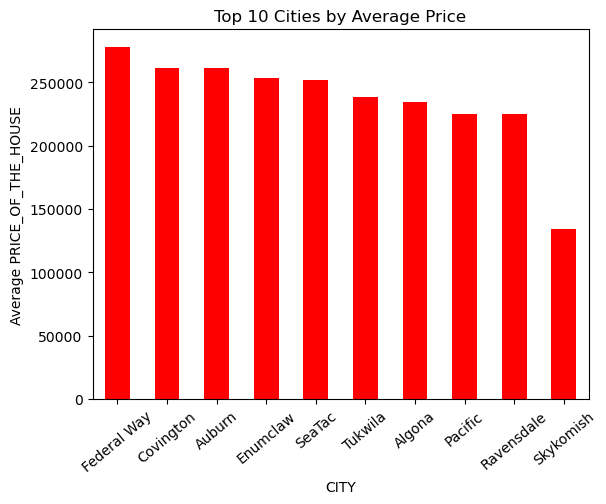

In [31]:
city_avg = df.groupby('CITY')['PRICE_OF_THE_HOUSE'].mean().sort_values(ascending=False).tail(10)
city_avg.plot(kind='bar', title='Top 10 Cities by Average Price',color='#FF0000')
plt.ylabel('Average PRICE_OF_THE_HOUSE')
plt.xticks(rotation=40)
plt.show()

Clyde Hill has the highest average house price among the top ten cities, making it the most expensive housing market in this dataset.
    
Snoqualmie Pass has the lowest average house price among the top ten cities, showing a notable contrast with Clyde Hill.

Mercer Island, Beaux Arts Village, and Bellevue follow closely behind Clyde Hill in terms of high housing prices, suggesting a concentration of affluent neighborhoods.

The gap between top and bottom-ranked cities indicates a significant variation in housing costs, which could be driven by factors like location desirability, economic conditions, and demand.


# HYPOTHESIS TESTING

In [153]:
waterfront = df[df['WATERFRONT_VIEWS'] ==1]['PRICE_OF_THE_HOUSE']
no_waterfront = df[df['WATERFRONT_VIEWS'] ==0]['PRICE_OF_THE_HOUSE']

t_stat, p_value = stats.ttest_ind(waterfront, no_waterfront)

print(f'T-statistic: {t_stat}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('Reject the null hypothesis. The average prices are significantly different.')
else:
    print('Fail to reject the null hypothesis. The average prices are not significantly different.')

T-statistic: 4.150825892220943
p-value: 3.389371718388899e-05
Reject the null hypothesis. The average prices are significantly different.


In [161]:
single_floor = df[df['FLOORS_COUNTS'] == 1.0]['PRICE_OF_THE_HOUSE']
multi_floor = df[df['FLOORS_COUNTS'] > 1.0]['PRICE_OF_THE_HOUSE']

t_stat, p_val = ttest_ind(single_floor, multi_floor)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: -18.150462520328315
P-value: 1.6073730874535462e-70
Reject the null hypothesis.


In [72]:
def analyze_single_city_price(df):
    city_name = df['CITY'].iloc[0]
    prices = df['PRICE_OF_THE_HOUSE'].dropna()

    n = len(prices)
    mean = np.mean(prices)
    std = np.std(prices, ddof=1)
    std_error = std / np.sqrt(n)
    z_score = 1.645  # Fixed for alpha=0.05

    margin_of_error = z_score * std_error
    upper = mean + margin_of_error
    lower = mean - margin_of_error

    print("SINGLE CITY HOUSE PRICE ANALYSIS")
    print(f"CITY: {city_name}")
    print(f"Z_SCORE (α=0.05): {z_score}")
    print(f"TOTAL_COUNT: {n}")
    print(f"MEAN_PRICE: {mean:.2f}")
    print(f"STD_DEV: {std:.2f}")
    print(f"STD_ERROR: {std_error:.2f}")
    print(f"MARGIN_OF_ERROR: {margin_of_error:.2f}")
    print(f"UPPER_LIMIT: {upper:.2f}")
    print(f"LOWER_LIMIT: {lower:.2f}")


In [34]:
df["CITY"]

0       Snoqualmie
1          Redmond
2           Renton
3           Auburn
4          Seattle
           ...    
3602       Seattle
3603       Seattle
3604       Seattle
3605      Bellevue
3606       Seattle
Name: CITY, Length: 3607, dtype: object

In [40]:
clydel_hill_df=df[df["CITY"]=="Clyde Hill"]

In [42]:
clydel_hill_df

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,...,STREET_ADDRESS,CITY,STATEZIP,COUNTRY,WATERFRONT_RANKING,VIEWS_CATEGORY,CONDITION_CATEGORY,YEAR_DIFFERENCE,AGE,PRICE_PER_SQFT
165,2014-05-07,1110000,4,2,2310.0,13300.0,1,0,0,3,...,9724 NE 14th St,Clyde Hill,WA 98004,USA,No,Poor,Average,55,75,480.519481
319,2014-05-12,927000,4,3,3300.0,12090.0,2,0,0,3,...,9155 NE 21st Pl,Clyde Hill,WA 98004,USA,No,Poor,Average,NOT RENOVATED YET,72,280.909091
970,2014-05-23,945000,4,2,2840.0,13367.0,1,0,0,3,...,9723 NE 15th St,Clyde Hill,WA 98004,USA,No,Poor,Average,56,73,332.746479
3530,2014-06-11,465000,3,3,2880.0,13500.0,1,0,4,5,...,9243 NE 20th St,Clyde Hill,WA 98004,USA,No,Excellent,Excellent,NOT RENOVATED YET,75,161.458333


In [44]:
final_Clyde=clydel_hill_df[["CITY","PRICE_OF_THE_HOUSE"]]

In [46]:
final_Clyde

,CITY,PRICE_OF_THE_HOUSE
165,Clyde Hill,1110000
319,Clyde Hill,927000
970,Clyde Hill,945000
3530,Clyde Hill,465000


In [74]:
analyze_single_city_price(final_Clyde)

SINGLE CITY HOUSE PRICE ANALYSIS
CITY: Clyde Hill
Z_SCORE (α=0.05): 1.645
TOTAL_COUNT: 4
MEAN_PRICE: 861750.00
STD_DEV: 277023.92
STD_ERROR: 138511.96
MARGIN_OF_ERROR: 227852.17
UPPER_LIMIT: 1089602.17
LOWER_LIMIT: 633897.83
